In [ ]:
from TICC_solver import TICC
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import pandas as pd


# #### Seizure read logit vector
orgfname = "../data/LTfeatures.csv"
dat = np.loadtxt(orgfname, delimiter=",")
print(dat.shape)
np.savetxt('../exp.txt', dat, fmt='%f', delimiter=',')
fname = "../exp.txt"
ticc = TICC(window_size=2, number_of_clusters=2, lambda_parameter=11e-2, beta=800, maxIters=100, threshold=2e-5, write_out_file=False, prefix_string="output_folder/", num_proc=1)
(cluster_assignment, cluster_MRFs) = ticc.fit(input_file=fname)

print(cluster_assignment)

##save the clustring results
np.savetxt('Results.txt', cluster_assignment, fmt='%d', delimiter=',')


(1080, 8)
(0, 8)
lam_sparse 0.11
switch_penalty 800
num_cluster 2
num stacked 2
completed getting the data



ITERATION ### 0
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
length of the cluster  0 ------> 336
length of the cluster  1 ------> 743
UPDATED THE OLD COVARIANCE
beginning the smoothening ALGORITHM
length of cluster # 0 --------> 340
length of cluster # 1 --------> 739
Done writing the figure







ITERATION ### 1
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
length of the cluster  0 ------> 340
length of the cluster  1 ------> 739
UPDATED THE OLD COVARIANCE
beginning the smoothening ALGORITHM
length of cluster # 0 --------> 340
length of cluster # 1 --------> 739
Done writing the figure








CONVERGED!!! BREAKING EARLY!!!



TRAINING F1 score: -1 -1 -1
[1.0000 1.0000 1.0000 ... 1.0000 1.0000 1.0000]


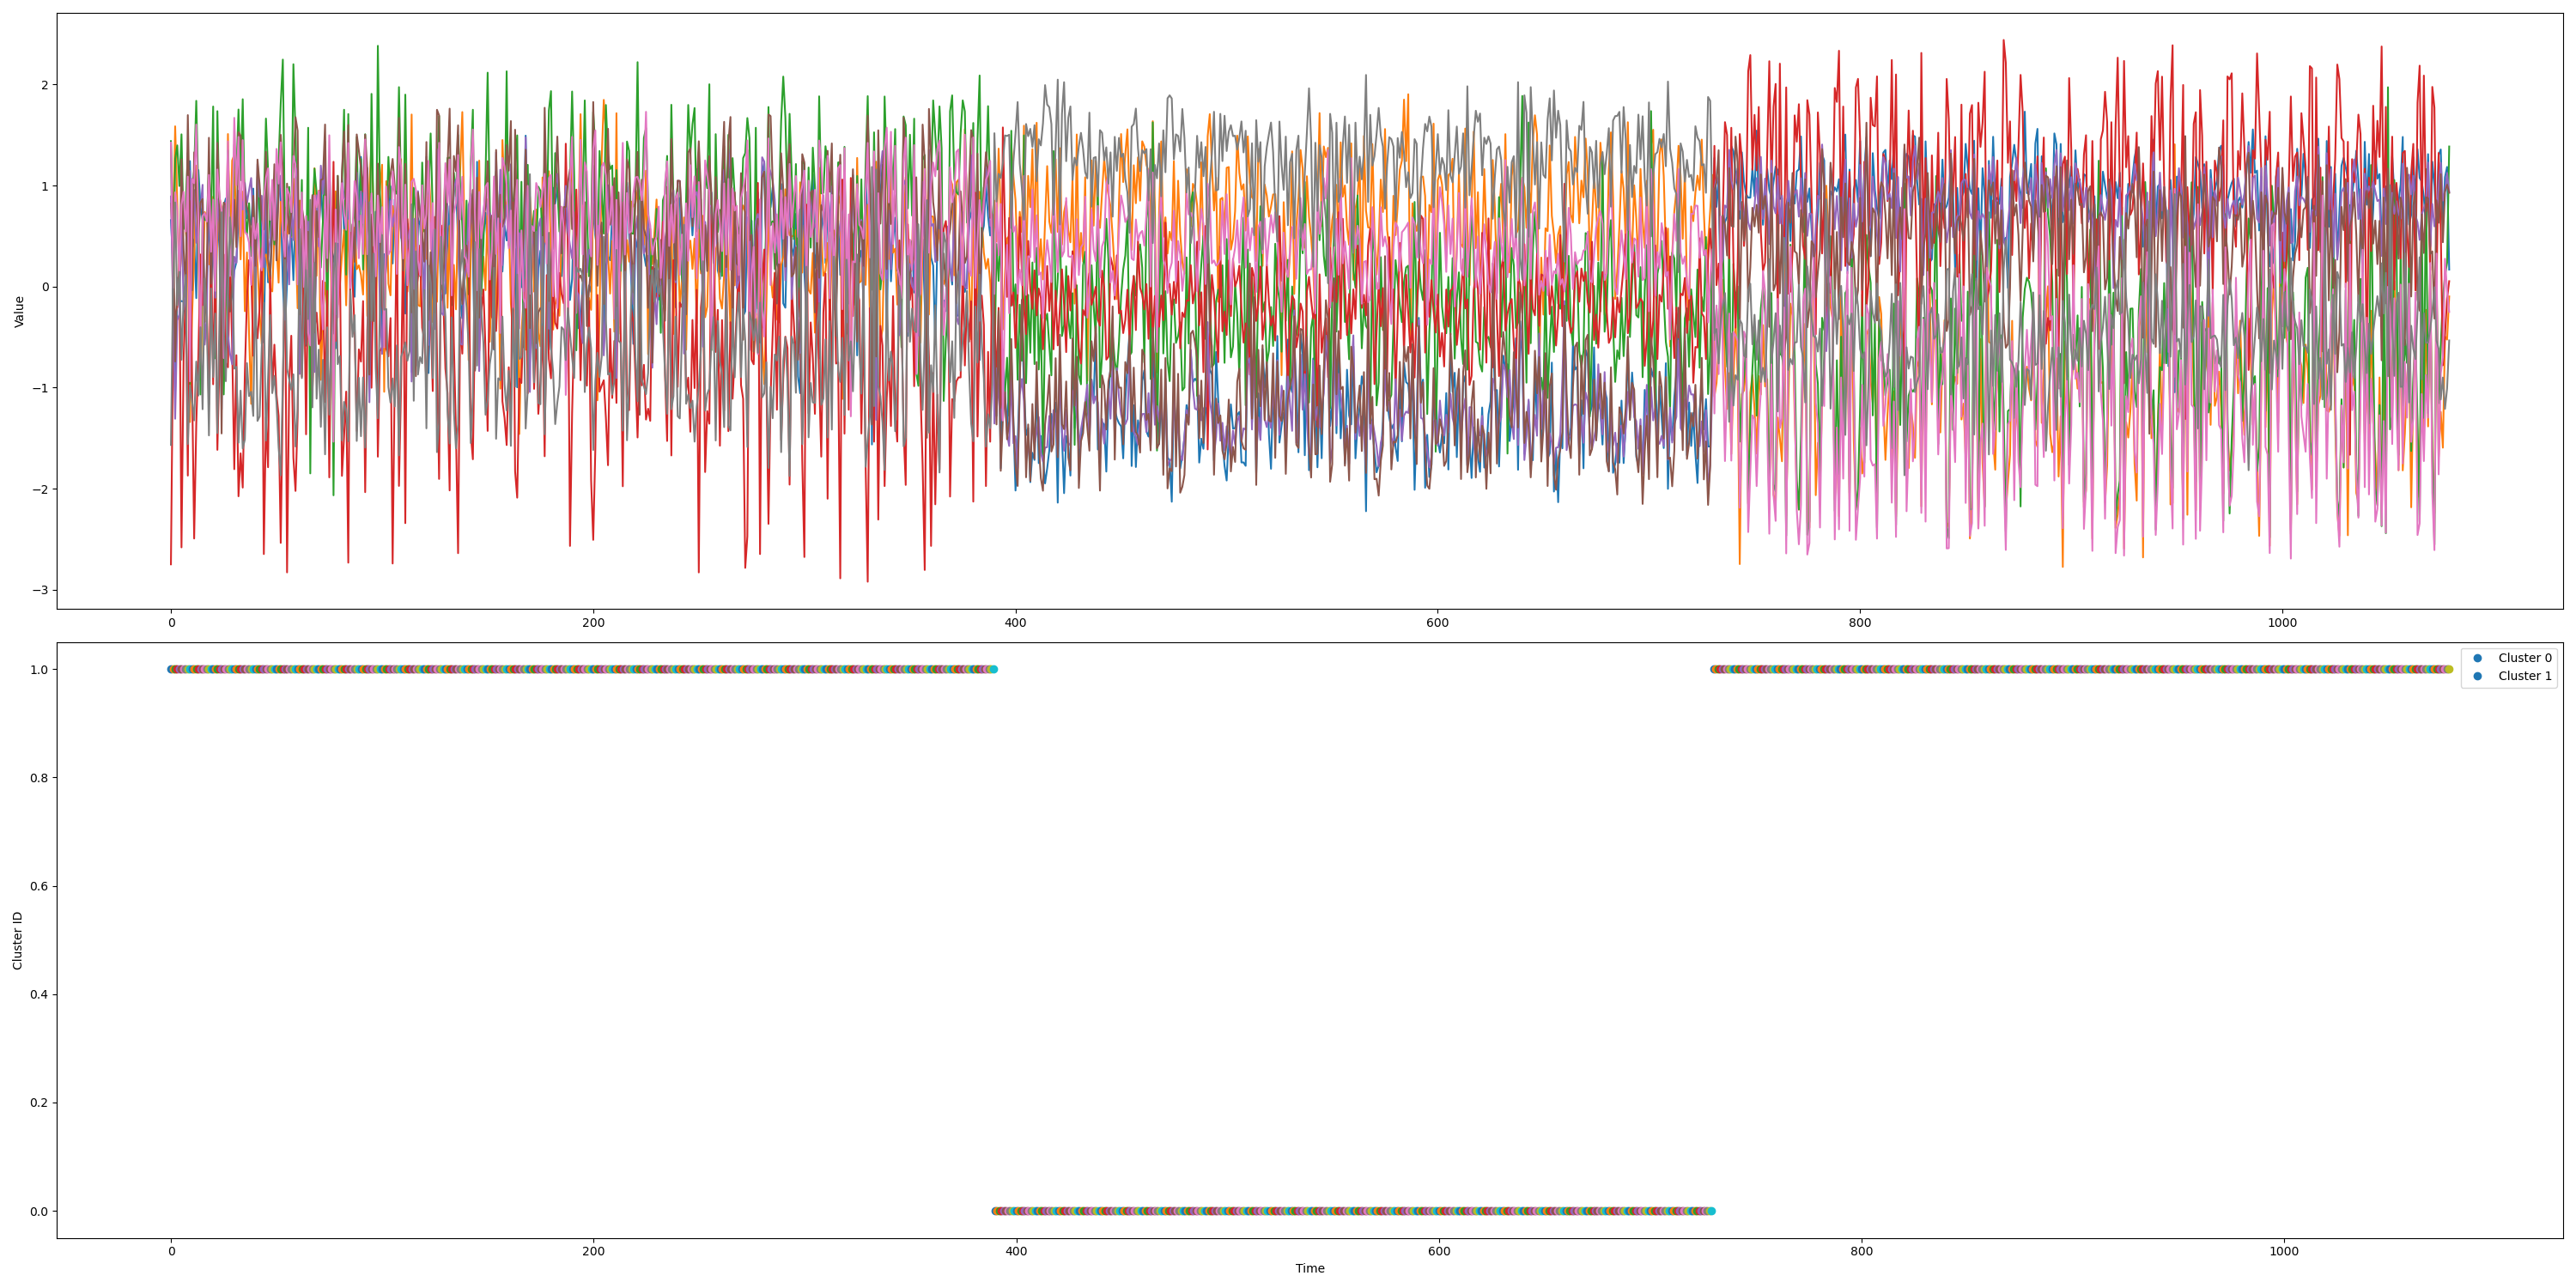

In [ ]:
def load_results(file_path):
    """
    Load the results from a text file into a numpy array.
    Each line in the text file represents a classification result.
    """
    return np.loadtxt(file_path, dtype=int)

def visualize_results(X, results, cmap, window_size, output_file='results_visualization.png', figsize=(15, 10)):
    """
    Visualize the original data and the classification results.
    
    Parameters:
    - X: Original data array.
    - results: Array of classification results, where each integer represents the cluster ID of each segment.
    - cmap: Color map for plotting.
    - window_size: Size of the sliding window.
    - output_file: Path to save the output visualization image.
    - figsize: Size of the figure.
    """
    plt.figure(figsize=figsize)  # Adjust the figure size
    plt.subplot(211)
    plt.plot(X)
    plt.ylabel('Value')

    plt.subplot(212)
    unique_clusters = np.unique(results)
    for cluster_id in unique_clusters:
        cluster_indices = np.where(results == cluster_id)[0]
        for idx in cluster_indices:
            plt.plot(range(idx * window_size, (idx + 1) * window_size), [cluster_id] * window_size, 'o', label=f'Cluster {cluster_id}' if idx == cluster_indices[0] else "")

    plt.xlabel('Time')
    plt.ylabel('Cluster ID')
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# load data
X = np.loadtxt(fname, delimiter=",")
X = scale(X)

# load clustering result
results = load_results('Results.txt')

# 设set window size
window_size = 1

# visualization results
visualize_results(X, results, plt.get_cmap('Set1'), window_size, figsize=(30, 15))

from IPython.display import Image, display
display(Image(filename='results_visualization.png'))


In [ ]:
real_label = pd.read_csv('../data/true_labels.csv', header=None)
DLmodel_label = pd.read_csv('../data/pred_labels.csv', header=None)
cluster_label = pd.read_csv('../Results.txt', header=None)

print(real_label.shape)
print(DLmodel_label.shape)
print(cluster_label.shape)

(1080, 1)
(1080, 1)
(1079, 1)


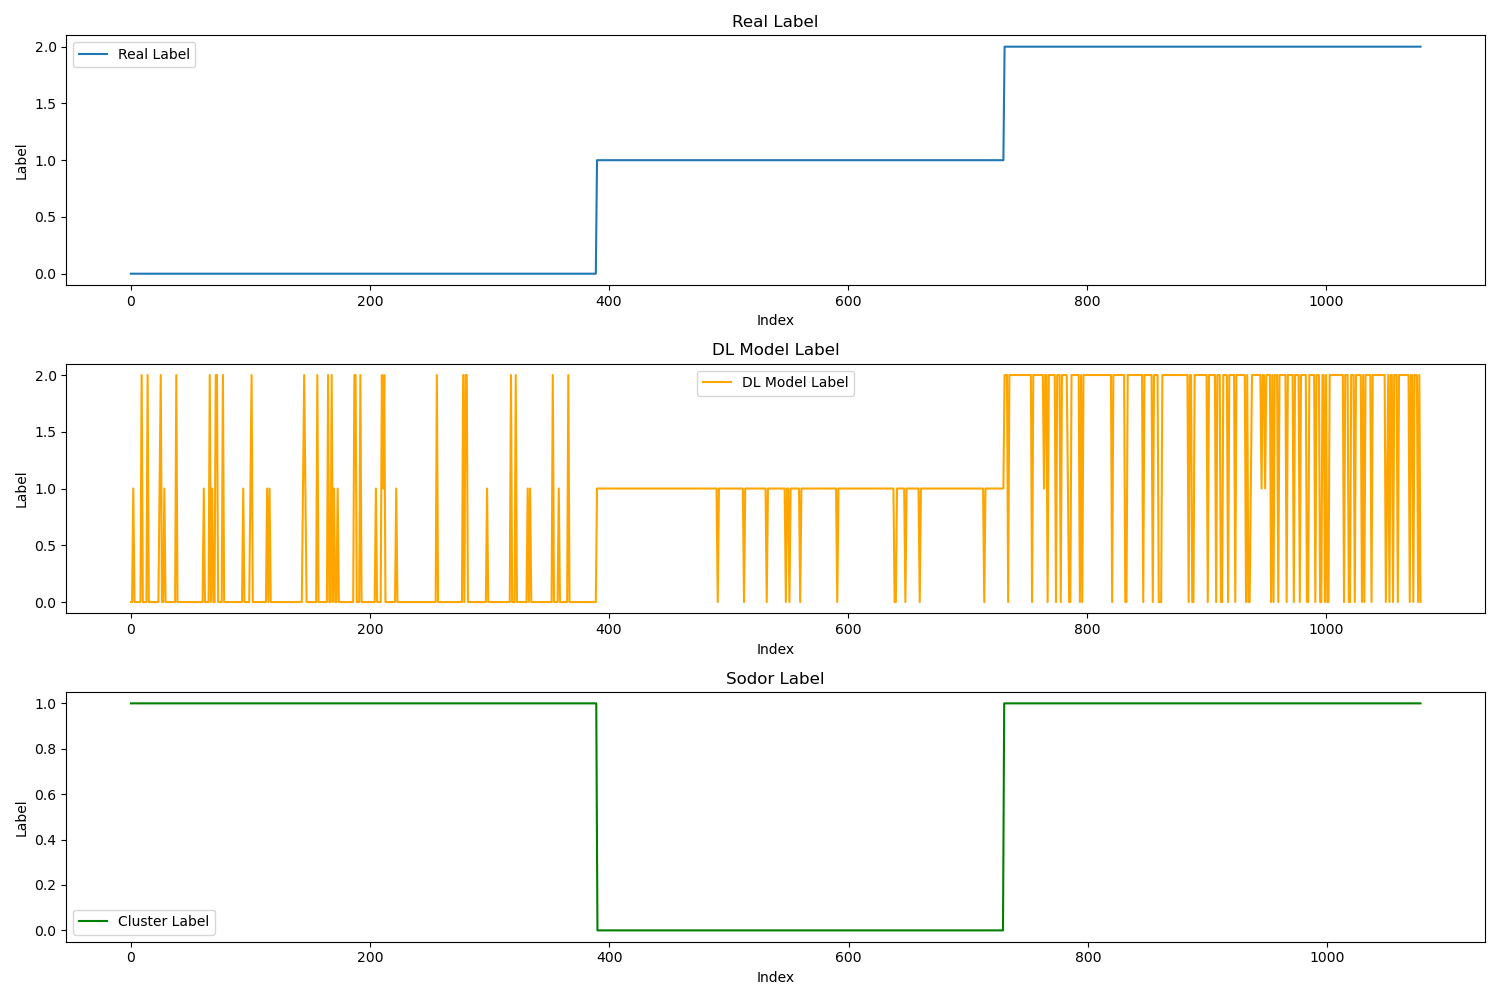

In [ ]:
def visualize_labels(real_label, DLmodel_label, cluster_label, output_file='label_visualization.png', figsize=(15, 10)):
    """
    Visualize real labels, DL model labels, and cluster labels.
    
    Parameters:
    - real_label: Array of real labels.
    - DLmodel_label: Array of DL model labels.
    - cluster_label: Array of cluster labels.
    - output_file: Path to save the output visualization image.
    - figsize: Size of the figure.
    """
    # Create a figure and subplots
    plt.figure(figsize=figsize)
    
    # Plot real_label
    plt.subplot(311)
    plt.plot(real_label, label='Real Label')
    plt.title('Real Label')
    plt.xlabel('Index')
    plt.ylabel('Label')
    plt.legend()
    
    # Plot DLmodel_label
    plt.subplot(312)
    plt.plot(DLmodel_label, label='DL Model Label', color='orange')
    plt.title('DL Model Label')
    plt.xlabel('Index')
    plt.ylabel('Label')
    plt.legend()
    
    # Plot cluster_label
    plt.subplot(313)
    plt.plot(cluster_label, label='Cluster Label', color='green')
    plt.title('Sodor Label')
    plt.xlabel('Index')
    plt.ylabel('Label')
    plt.legend()
    
    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()


# Visualize and save the labels
visualize_labels(real_label, DLmodel_label, cluster_label, output_file='label_visualization.png', figsize=(15, 10))

# Display the saved image
from IPython.display import Image, display
display(Image(filename='label_visualization.png'))
